In [1]:
from mnistDataLoader import MnistDataloader
%pip install import-ipynb
import import_ipynb
from fcn import NN
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
importing Jupyter notebook from fcn.ipynb
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
mnist_dataloader = MnistDataloader('train-images-idx3-ubyte/train-images-idx3-ubyte', 'train-labels-idx1-ubyte/train-labels-idx1-ubyte', 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

x_train = np.stack(x_train).reshape((60000, 784, 1))
y_train = np.stack(y_train)
x_test = np.stack(x_test).reshape((10000, 784, 1))
y_test = np.stack(y_test)

x_train = (lambda x:x/256)(x_train)
x_test = (lambda x:x/256)(x_test)

def to_one_hot(x, length=10):
    a = [0] * length
    a[x] = 1
    return a

y_train = np.array(list(map(to_one_hot, y_train))).reshape(60000, 10, 1)
y_test = np.array(list(map(to_one_hot, y_test))).reshape(10000, 10, 1)

In [3]:
nn = NN([
    784, 
    30,
    10
])

In [11]:
nn.train(x_train,y_train, epochs=50, mini_batch_size=10, lr=3.0)

100%|██████████| 6000/6000 [00:03<00:00, 1951.45it/s]


Epoch 1 complete


100%|██████████| 6000/6000 [00:03<00:00, 1932.34it/s]


Epoch 2 complete


100%|██████████| 6000/6000 [00:03<00:00, 1998.86it/s]


Epoch 3 complete


100%|██████████| 6000/6000 [00:03<00:00, 1706.24it/s]


Epoch 4 complete


100%|██████████| 6000/6000 [00:03<00:00, 1923.26it/s]


Epoch 5 complete


100%|██████████| 6000/6000 [00:03<00:00, 1808.81it/s]


Epoch 6 complete


100%|██████████| 6000/6000 [00:03<00:00, 1907.75it/s]


Epoch 7 complete


100%|██████████| 6000/6000 [00:02<00:00, 2013.78it/s]


Epoch 8 complete


100%|██████████| 6000/6000 [00:02<00:00, 2029.83it/s]


Epoch 9 complete


100%|██████████| 6000/6000 [00:03<00:00, 1877.64it/s]


Epoch 10 complete


100%|██████████| 6000/6000 [00:03<00:00, 1954.61it/s]


Epoch 11 complete


100%|██████████| 6000/6000 [00:03<00:00, 1905.35it/s]


Epoch 12 complete


100%|██████████| 6000/6000 [00:03<00:00, 1868.13it/s]


Epoch 13 complete


100%|██████████| 6000/6000 [00:03<00:00, 1699.88it/s]


Epoch 14 complete


100%|██████████| 6000/6000 [00:03<00:00, 1663.25it/s]


Epoch 15 complete


 25%|██▌       | 1527/6000 [00:00<00:02, 1798.84it/s]


KeyboardInterrupt: 

In [12]:
print(f'Neural network accuracy: {nn.evaluate(list(zip(x_test,y_test))) * 100}%') 

Neural network accuracy: 89.03999999999999%


Prediction: 6


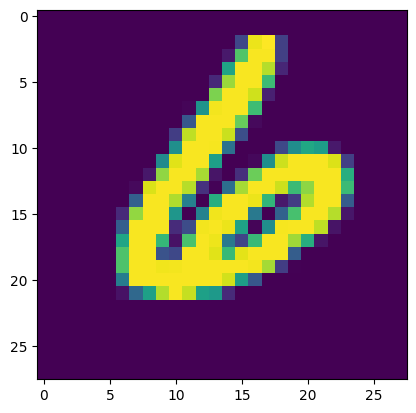

In [17]:
index = np.random.randint(0,len(x_test))
print(f"Prediction: {np.argmax(nn.forward(x_test[index]))}")
plt.imshow(x_test[index].reshape(28,28), interpolation='nearest')